##### Data Analysis Task for Job Interview
Scenario: Payments to Suppliers
You are a data analyst at a local council. You are given a dataset that contains information about the payments made to the suppliers. The dataset can be found here: All Payments to Suppliers - Datasets - York Open Data. Please use the 2023/24 payments to suppliers dataset. 
Your task is to perform some data analysis on the dataset to provide insights to senior management. 
Examples include:
1.	How many suppliers are there in the dataset?
2.	What is the total amount of payments made to the suppliers in the dataset?
3.	What is the average payment amount per supplier?
4.	Which expense area has the highest total payment amount?
Please provide any additional visualisation and insights that you feel are appropriate. 


In [6]:
#import necessary libraries for data manipulation
import numpy as np
import pandas as pd

#import necessary libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Understanding the structure of data


In [70]:
# Read data from csv file


data_csv = pd.read_csv('/Users/vineethadevassiakaithakkal/Documents/JustGroup/over250payments2023.csv', encoding='latin1')

# Creating a copy of data set
df = data_csv.copy()

In [73]:
# Check the shape of data set
df.shape


(51535, 13)

- There are 51535 rows and 13 columns in the data dataset

In [74]:
# Understanding the data
df.head()

,Organisation_Name,Directorate,Department,Service_Plan,Creditor_Name,Payment_Date,Transaction_No,Card_Transaction,Net_Amount,Irrecoverable_VAT,Subjective_Group,Subjective_Subgroup,Subjective_Detail
0,City of York Council,Adult Social Care and Integration,AD Adult Social Care,Adult Safeguarding,United Response,04/04/2023,202324CR00000001,NaN,-431.16,NaN,Supplies And Services,Services,Day Support
1,City of York Council,Adult Social Care and Integration,AD Adult Social Care,Operations,Newcross Healthcare Solutions,26/04/2023,202324CR00000002,NaN,9326.13,NaN,Employees,Indirect Employees,External Temporary Staff
2,City of York Council,Adult Social Care and Integration,AD Adult Social Care,Operations,Newcross Healthcare Solutions,26/04/2023,202324CR00000003,NaN,4115.00,NaN,Employees,Indirect Employees,External Temporary Staff
3,City of York Council,Adult Social Care and Integration,AD Adult Social Care,Operations,Newcross Healthcare Solutions,26/04/2023,202324CR00000004,NaN,5389.65,NaN,Employees,Indirect Employees,External Temporary Staff
4,City of York Council,Adult Social Care and Integration,AD Adult Social Care,Hospital and Mental Health,Randstad Public Services Ltd,06/04/2023,202324CR00000005,NaN,1611.35,NaN,Employees,Indirect Employees,External Temporary Staff


In [23]:
df.tail()

,Organisation_Name,Directorate,Department,Service_Plan,Creditor_Name,Payment_Date,Transaction_No,Card_Transaction,Net_Amount,Irrecoverable_VAT,Subjective_Group,Subjective_Subgroup,Subjective_Detail
51530,City of York Council,Place Directorate,Economy Regeneration and Housing,Housing Services,St Paul`s Lodge,31/01/2024 00:00,202324CR00051531,NaN,595.0,NaN,Supplies And Services,Misc Expenses,Bed and Breakfast
51531,City of York Council,Place Directorate,Economy Regeneration and Housing,Housing Services,St Paul`s Lodge,31/01/2024 00:00,202324CR00051532,NaN,595.0,NaN,Supplies And Services,Misc Expenses,Bed and Breakfast
51532,City of York Council,Place Directorate,Economy Regeneration and Housing,Housing Services,St Paul`s Lodge,31/01/2024 00:00,202324CR00051533,NaN,595.0,NaN,Supplies And Services,Misc Expenses,Bed and Breakfast
51533,City of York Council,Place Directorate,Economy Regeneration and Housing,Housing Services,St Paul`s Lodge,31/01/2024 00:00,202324CR00051534,NaN,595.0,NaN,Supplies And Services,Misc Expenses,Bed and Breakfast
51534,City of York Council,Place Directorate,Economy Regeneration and Housing,Housing Services,St Paul`s Lodge,31/01/2024 00:00,202324CR00051535,NaN,595.0,NaN,Supplies And Services,Misc Expenses,Bed and Breakfast


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51535 entries, 0 to 51534
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Organisation_Name    51535 non-null  object 
 1   Directorate          51535 non-null  object 
 2   Department           51535 non-null  object 
 3   Service_Plan         51535 non-null  object 
 4   Creditor_Name        51535 non-null  object 
 5   Payment_Date         51535 non-null  object 
 6   Transaction_No       51535 non-null  object 
 7   Card_Transaction     0 non-null      float64
 8   Net_Amount           51535 non-null  float64
 9   Irrecoverable_VAT    0 non-null      float64
 10  Subjective_Group     51535 non-null  object 
 11  Subjective_Subgroup  51535 non-null  object 
 12  Subjective_Detail    51535 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.1+ MB


In [27]:
# checking for null values
df.isnull().sum()

Organisation_Name          0
Directorate                0
Department                 0
Service_Plan               0
Creditor_Name              0
Payment_Date               0
Transaction_No             0
Card_Transaction       51535
Net_Amount                 0
Irrecoverable_VAT      51535
Subjective_Group           0
Subjective_Subgroup        0
Subjective_Detail          0
dtype: int64

-  I can see that transactions do not involve card payments or do not have any Irrecoverable VAT.Further investigation can be done to understand if there are any mismatch in the data.
- Otherwise there are no null values.

In [35]:
df.duplicated().sum()

0

- There are no dupliacte rows

In [101]:
# Statistical summary of paymemt amount
Net_amount_Summary = df['Net_Amount'].describe()
# Convert the summary statistics to integers
Net_amount_Summary_int = Net_amount_Summary.astype(int)

print(Net_amount_Summary_int)
#print(Net_amount_Summary)


count      51535
mean        4326
std        36660
min      -193743
25%          331
50%          730
75%         3212
max      5761247
Name: Net_Amount, dtype: int64


- Out of 51535 transactions mean transaction amount is approximately 4326





###### Find average payment amount per supplier
average_payment_per_supplier = df.groupby('Creditor_Name')['Net_Amount'].mean()
print('Average Payment amount :',average_payment_per_supplier)


## Univariate Analysis

In [91]:
# Count of total number of Suppliers
total_suppliers = df['Creditor_Name'].nunique()
print(total_suppliers)

2304


- There are around 2304 suppliers

In [47]:
# Net amount paid to the suppliers
net_amount_paid = df['Net_Amount'].sum()
print("Total Amount paid to Suppliers", net_amount_paid)

Total Amount paid to Suppliers 222968319.56000003


- Total amount paid to the suppliers is around two hundred and twenty two million 

In [77]:
# Find which expense area has the hoighest total amount
highest_total_amount = df.groupby('Subjective_Group')['Net_Amount'].sum().max()
highest_spent_service = df.groupby('Subjective_Group')['Net_Amount'].sum().idxmax()
print(highest_total_amount)
print(highest_spent_service)



113512405.49
Supplies And Services


- Supplies and Services is the highest expense area


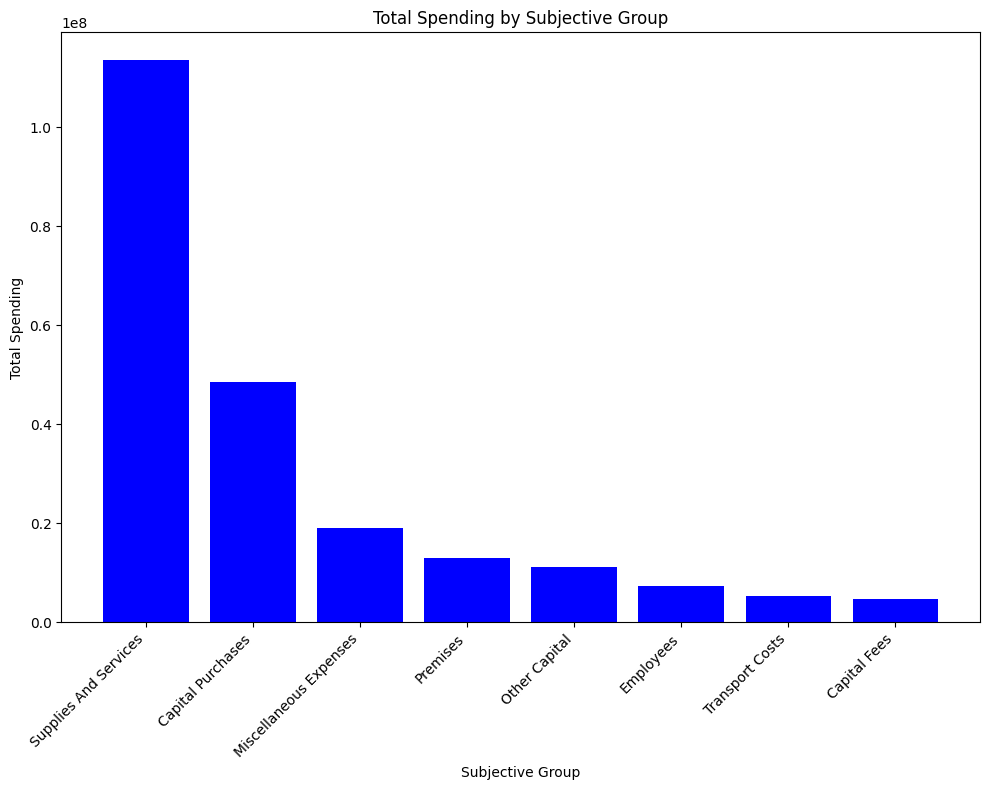

In [90]:
# Hitogram visualisation of amount paid to the Subjective_Group

grouped_data = df.groupby('Subjective_Group')['Net_Amount'].sum().reset_index()

# Sort the data by total spending in descending order for better visualization
grouped_data_sorted = grouped_data.sort_values(by='Net_Amount', ascending=False)

plt.figure(figsize=(10, 8))  
plt.bar(grouped_data_sorted['Subjective_Group'], grouped_data_sorted['Net_Amount'], color='blue')
plt.title('Total Spending by Subjective Group')
plt.xlabel('Subjective Group')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()